In [1]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

In [2]:
# User defined inputs
p_HH = 0.5
p_TT = 0.5
p_FF = 0.7
p = 0.7
q = 0.3
np.random.seed(28177182)

In [3]:
lamb1, lamb2, lamb3 = 15,7,12

In [4]:
class state(Enum):
    # Use enum to represent 3 states
    head = 1
    tail = 2
    fair = 3

def stepGenerator(p_HH, p_TT, p_FF, lamb1, lamb2, lamb3, curr):
  # This function returns a tuple of next state that we are in, and times we stay at the current stage
  # Notice that we decide if we switch stage after we simulate a Poisson process

  u = np.random.uniform()
  if curr == state.fair:
    if u < p_FF:
      return curr, np.random.poisson(lamb3)
    elif p_FF < u < (1+p_FF)/2:
      return state.head, np.random.poisson(lamb3)
    else:
      return state.tail, np.random.poisson(lamb3)
  elif curr == state.head:
    if u < p_HH:
      return curr, np.random.poisson(lamb1)
    else:
      return state.fair, np.random.poisson(lamb1)
  else:
    if u < p_TT:
      return curr, np.random.poisson(lamb2)
    else:
      return state.fair, np.random.poisson(lamb2)

def stateGenerator(p_HH, p_TT, p_FF, lamb1, lamb2, lamb3, L):
  # Generate array of length L+1 representing state at each time index 
  resL = [state.fair]
  curr = state.fair
  while len(resL) < L+1:
    next, step = stepGenerator(p_HH, p_TT, p_FF, lamb1, lamb2, lamb3, curr)
    resL.extend([curr for i in range(step)])
    curr = next
  resL = resL[0: L+1]
  res = np.array(resL)
  return res

In [5]:
import collections
counter = collections.Counter(stateGenerator(p_HH, p_TT, p_FF, lamb1, lamb2, lamb3, 5000))
counter

Counter({<state.fair: 3>: 3188, <state.head: 1>: 1306, <state.tail: 2>: 507})

In [6]:
def pathSim(p_HH, p_TT, p_FF, p, q, S, sigma, L, lamb1, lamb2, lamb3, moveType='uni'):
  curr = state.fair
  res = np.zeros(L+1)
  res[0] = S
  stateArr = stateGenerator(p_HH, p_TT, p_FF, lamb1, lamb2, lamb3, L)
  for i in range(1, L+1):
    u = np.random.uniform()
    curr = stateArr[i]
    if curr == state.fair:
      if u < 0.5:
        if moveType == 'uni':
          res[i] = res[i-1] + sigma * np.random.uniform()
        else:
          res[i] = res[i-1] + sigma * np.abs(np.random.normal())
      else:
        if moveType == 'uni':
          res[i] = res[i-1] - sigma * np.random.uniform()
          if res[i] < 0: res[i] = 0 
        else:
          res[i] = res[i-1] - sigma * np.abs(np.random.normal())
          if res[i] < 0: res[i] = 0 
    elif curr == state.head:
      if u < p:
        if moveType == 'uni':
          res[i] = res[i-1] + sigma * np.random.uniform()
        else:
          res[i] = res[i-1] + sigma * np.abs(np.random.normal())
      else:
        if moveType == 'uni':
          res[i] = res[i-1] - sigma * np.random.uniform()
          if res[i] < 0: res[i] = 0 
        else:
          res[i] = res[i-1] - sigma * np.abs(np.random.normal())
          if res[i] < 0: res[i] = 0 
    else:
      if u < q:
        if moveType == 'uni':
          res[i] = res[i-1] + sigma * np.random.uniform()
        else:
          res[i] = res[i-1] + sigma * np.abs(np.random.normal())
      else:
        if moveType == 'uni':
          res[i] = res[i-1] - sigma * np.random.uniform()
          if res[i] < 0: res[i] = 0 
        else:
          res[i] = res[i-1] - sigma * np.abs(np.random.normal())
          if res[i] < 0: res[i] = 0 
      
  return res

In [7]:
L = 5000

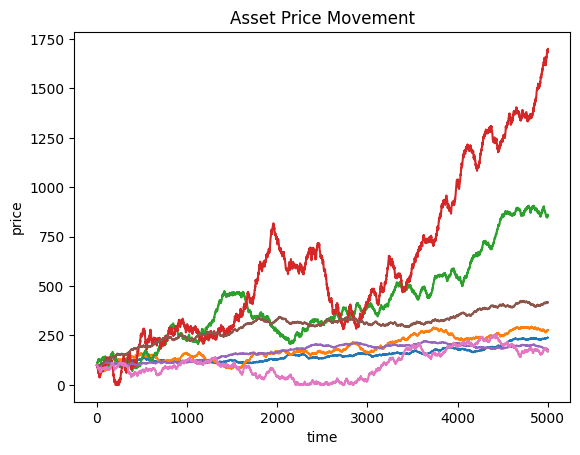

In [8]:
x = np.arange(0, L+1)
plt.title("Asset Price Movement")
plt.xlabel("time")
plt.ylabel("price")
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 1, L, lamb1, lamb2, lamb3, moveType='uni'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 2, L, lamb1, lamb2, lamb3,  moveType='uni'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 5, L, lamb1, lamb2, lamb3,  moveType='uni'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 10, L, lamb1, lamb2, lamb3,  moveType='uni'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 0.5, L, lamb1, lamb2, lamb3,  moveType='norm'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 1, L, lamb1, lamb2, lamb3,  moveType='norm'))
plt.plot(x, pathSim(p_HH, p_TT, p_FF, p, q, 100, 2, L, lamb1, lamb2, lamb3,  moveType='norm'))
plt.show()

#Stats Analysis Part:

In [9]:
import pandas as pd
import scipy
from scipy.stats import kurtosis
from scipy.stats import skew
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [10]:
m = 10
L = 100
S = 100
sigma = 0.5
lamb1 = 15
lamb2 = 7
lamb3 = 12

Conduct a time series analysis on a single time series

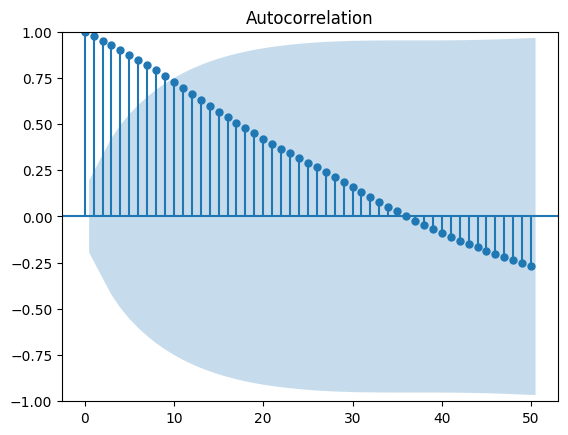

In [11]:
test = pathSim(p_HH, p_TT, p_FF, p, q, S, sigma, L, lamb1, lamb2, lamb3, moveType='norm')
plot_acf(test, lags=50)
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


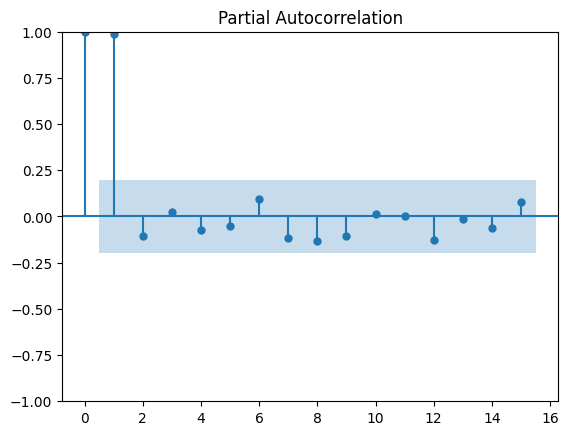

In [12]:
plot_pacf(test, lags=15)
plt.show()

In [13]:
L = 1000
sim_list = []
for i in range(1, 11):
    sim_list.append('Sim{}'.format(i))

In [14]:
dfa = []
for i in range(m):
  dfa.append(pathSim(p_HH, p_TT, p_FF, p, q, S, sigma, L, lamb1, lamb2, lamb3, moveType='norm'))
df = pd.DataFrame(dfa).transpose()
df.columns = sim_list
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')
# print(corr_matrix)

,Sim1,Sim2,Sim3,Sim4,Sim5,Sim6,Sim7,Sim8,Sim9,Sim10
Sim1,1.000000,0.507334,0.894060,0.904417,0.652222,-0.599959,0.799385,0.903920,-0.105169,-0.741052
Sim2,0.507334,1.000000,0.412758,0.450083,0.433475,0.001635,0.399975,0.605970,0.198771,-0.517791
Sim3,0.894060,0.412758,1.000000,0.890630,0.690210,-0.552652,0.760723,0.830969,-0.135945,-0.746724
Sim4,0.904417,0.450083,0.890630,1.000000,0.520665,-0.593401,0.712017,0.798577,-0.294643,-0.667261
Sim5,0.652222,0.433475,0.690210,0.520665,1.000000,-0.073339,0.583645,0.628453,0.309199,-0.513433
Sim6,-0.599959,0.001635,-0.552652,-0.593401,-0.073339,1.000000,-0.659084,-0.468139,0.568790,0.481531
Sim7,0.799385,0.399975,0.760723,0.712017,0.583645,-0.659084,1.000000,0.861551,-0.204223,-0.845217
Sim8,0.903920,0.605970,0.830969,0.798577,0.628453,-0.468139,0.861551,1.000000,-0.030726,-0.855126
Sim9,-0.105169,0.198771,-0.135945,-0.294643,0.309199,0.568790,-0.204223,-0.030726,1.000000,-0.066465
Sim10,-0.741052,-0.517791,-0.746724,-0.667261,-0.513433,0.481531,-0.845217,-0.855126,-0.066465,1.000000


In [15]:
ac, kurt, skew = np.zeros(m), np.zeros(m), np.zeros(m)
for i in range(m):
  ac[i] = df.iloc[:,i].autocorr()
  kurt[i] = kurtosis(df.iloc[:,i])
  skew[i] = scipy.stats.skew(df.iloc[:,i])

Text(0.5, 1.0, 'Skewness')

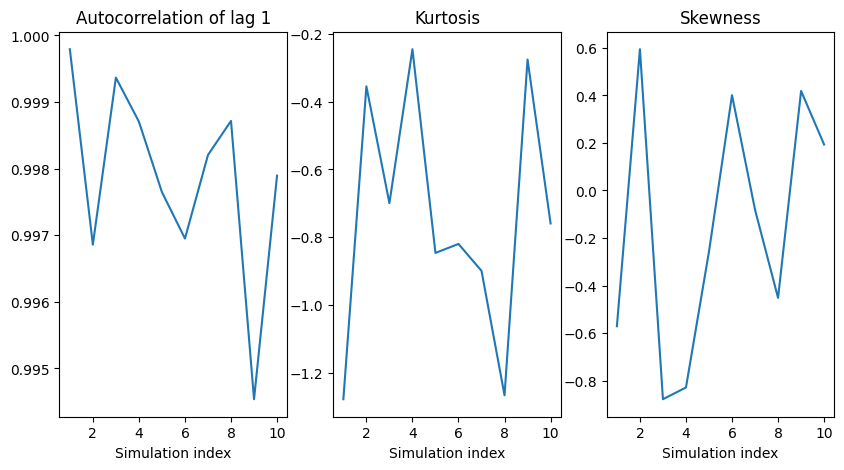

In [16]:
fig, axs = plt.subplots(1, 3, figsize = (10,5))
x = np.linspace(1,10,10)
axs[0].plot(x, ac)
axs[0].set_xlabel('Simulation index')
axs[0].set_title('Autocorrelation of lag 1')
axs[1].plot(x, kurt)
axs[1].set_xlabel('Simulation index')
axs[1].set_title('Kurtosis')
axs[2].plot(x, skew)
axs[2].set_xlabel('Simulation index')
axs[2].set_title('Skewness')
